In [129]:
# import modules
import pandas as pd
pd.set_option('display.max_columns', 20)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read data
df = pd.read_csv("Churn_Modelling.csv")
display(df)


# Wyłączenie notacji naukowej dla liczb zmiennoprzecinkowych
#pd.options.display.float_format = '{:,.0f}'.format
pd.reset_option('display.float_format')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [130]:
#delete unnecessary column
df = df.drop('RowNumber', axis=1)

In [131]:
#check for datatypes
display(df.dtypes)

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [132]:
# List of columns to be converted to 'category' type

category_columns = ['Geography',
                    'Gender',
                    'HasCrCard',
                    'IsActiveMember',
                    'Exited']

# Convert each column to 'category' type
for column in category_columns:
    df[column] = df[column].astype('category')

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


<Figure size 1000x600 with 0 Axes>

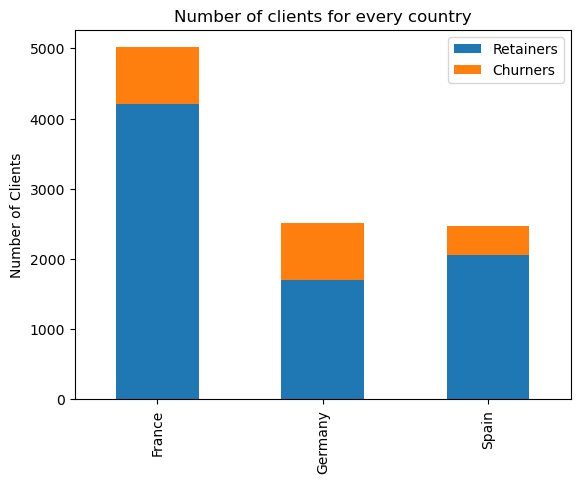

Exited,0,1
Geography,,
France,83.85%,16.15%
Germany,67.56%,32.44%
Spain,83.33%,16.67%


<Figure size 1000x600 with 0 Axes>

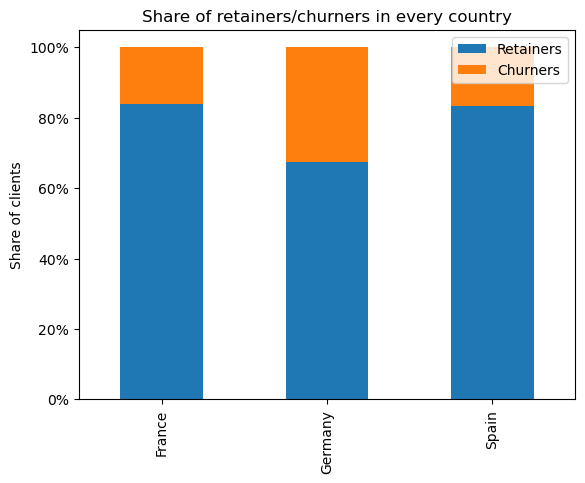

In [133]:
# analizing Geography
from matplotlib.ticker import PercentFormatter

# creating crosstab
Geography_crosstab = pd.crosstab(df['Geography'], df['Exited'])
display(Geography_crosstab)
# moves the index (Geography) to a column and resets the index to default integers
Geography_crosstab = Geography_crosstab.reset_index()

# bar plot
plt.figure(figsize=(10, 6))
Geography_crosstab.plot(kind='bar', x='Geography', stacked=True, ) #
plt.title('Number of clients for every country')
plt.xlabel('')
plt.ylabel('Number of Clients')
plt.legend(labels=['Retainers', 'Churners'])  #  0=Retainers, 1=Churners
plt.show()

#####################################################

# creating crosstab with normalization
Geography_crosstab = pd.crosstab(df['Geography'], df['Exited'], normalize='index') * 100
display(Geography_crosstab.round(2).astype(str) + '%')
# moves the index (Geography) to a column and resets the index to default integers
Geography_crosstab = pd.crosstab(df['Geography'], df['Exited'], normalize='index')
Geography_crosstab = Geography_crosstab.reset_index()

# bar plot of normalized values
plt.figure(figsize=(10, 6))
ax = Geography_crosstab.plot(kind='bar', x='Geography', stacked=True)
plt.title('Share of retainers/churners in every country')
plt.xlabel('')
plt.ylabel('Share of clients')
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.legend(labels=['Retainers', 'Churners'])  #  0=Retainers, 1=Churners
plt.show()

Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898


<Figure size 1000x600 with 0 Axes>

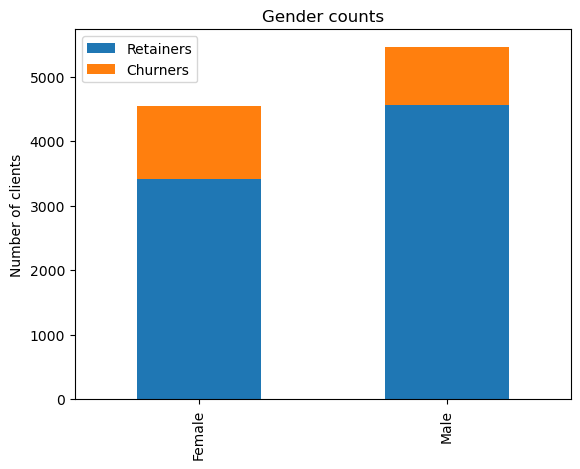

Exited,0,1
Gender,,
Female,74.93%,25.07%
Male,83.54%,16.46%


<Figure size 1000x600 with 0 Axes>

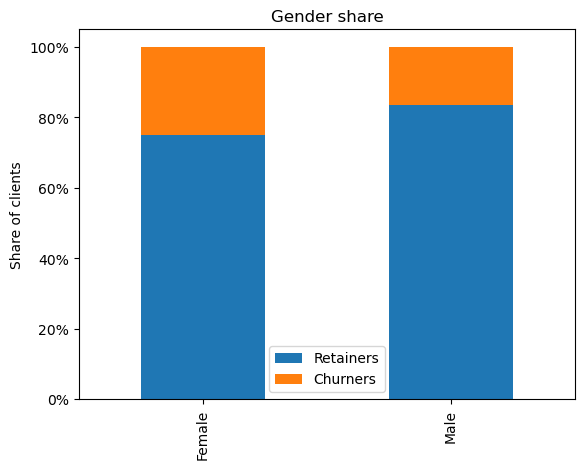

In [134]:
# analizing Gender
from matplotlib.ticker import PercentFormatter

# creating crosstab
Gender_crosstab = pd.crosstab(df['Gender'], df['Exited'])
display(Gender_crosstab)
# moves the index (Gender) to a column and resets the index to default integers
Gender_crosstab = Gender_crosstab.reset_index()

# bar plot
plt.figure(figsize=(10, 6))
Gender_crosstab.plot(kind='bar', x='Gender', stacked=True, ) #
plt.title('Gender counts')
plt.xlabel('')
plt.ylabel('Number of clients')
plt.legend(labels=['Retainers', 'Churners'])  #  0=Retainers, 1=Churners
plt.show()

#####################################################

# creating crosstab with normalization
Gender_crosstab = pd.crosstab(df['Gender'], df['Exited'], normalize='index') * 100
display(Gender_crosstab.round(2).astype(str) + '%')
# moves the index (Gender) to a column and resets the index to default integers
Gender_crosstab = pd.crosstab(df['Gender'], df['Exited'], normalize='index')
Gender_crosstab = Gender_crosstab.reset_index()

# bar plot of normalized values
plt.figure(figsize=(10, 6))
ax = Gender_crosstab.plot(kind='bar', x='Gender', stacked=True)
plt.title('Gender share')
plt.xlabel('')
plt.ylabel('Share of clients')
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.legend(labels=['Retainers', 'Churners'])  #  0=Retainers, 1=Churners
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16244\3535115319.py:6: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['HasCrCard'] = df['HasCrCard'].replace({0: 'Non-Credit-Card-Owners', 1: 'Credit-Card-Owners'})


Exited,0,1
HasCrCard,,
Non-Credit-Card-Owners,2332,613
Credit-Card-Owners,5631,1424


<Figure size 1000x600 with 0 Axes>

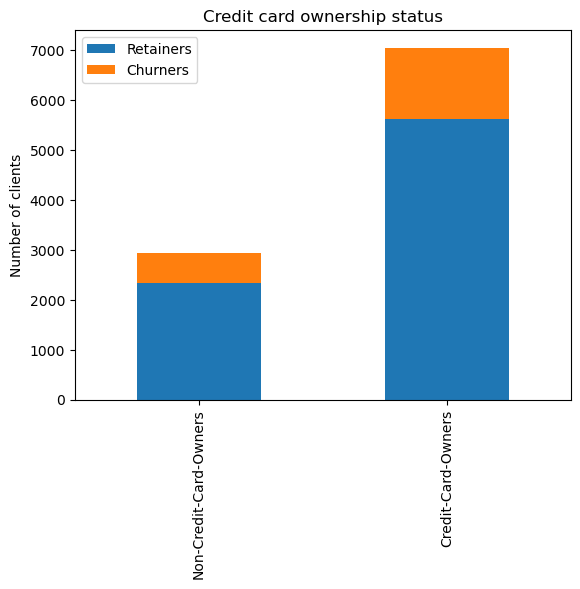

Exited,0,1
HasCrCard,,
Non-Credit-Card-Owners,79.19%,20.81%
Credit-Card-Owners,79.82%,20.18%


<Figure size 1000x600 with 0 Axes>

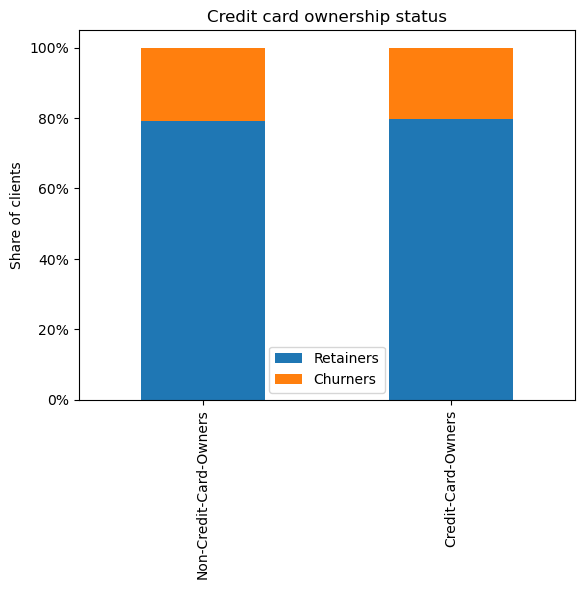

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16244\3535115319.py:42: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['HasCrCard'] = df['HasCrCard'].replace({'Non-Credit-Card-Owners' : 0, 'Credit-Card-Owners':1})
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16244\3535115319.py:42: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['HasCrCard'] = df['HasCrCard'].replace({'Non-Credit-Card-Owners' : 0, 'Credit-Card-Owners':1})


In [135]:
# Analysis of the impact of having a credit card on customer retention/churn

from matplotlib.ticker import PercentFormatter

# Replace 0 and 1 in HasCrCard column with 'Non-Credit-Card-Owners' and 'Credit-Card-Owners'
df['HasCrCard'] = df['HasCrCard'].replace({0: 'Non-Credit-Card-Owners', 1: 'Credit-Card-Owners'})

# creating crosstab
HasCrCard_crosstab = pd.crosstab(df['HasCrCard'], df['Exited'])
display(HasCrCard_crosstab)
# moves the index (HasCrCard) to a column and resets the index to default integers
HasCrCard_crosstab = HasCrCard_crosstab.reset_index()

# bar plot
plt.figure(figsize=(10, 6))
HasCrCard_crosstab.plot(kind='bar', x='HasCrCard', stacked=True, ) #
plt.title('Credit card ownership status')
plt.xlabel('')
plt.ylabel('Number of clients')
plt.legend(labels=['Retainers', 'Churners'])  #  0=Retainers, 1=Churners
plt.show()

#####################################################

# creating crosstab with normalization
HasCrCard_crosstab = pd.crosstab(df['HasCrCard'], df['Exited'], normalize='index') * 100
display(HasCrCard_crosstab.round(2).astype(str) + '%')
# moves the index (HasCrCard) to a column and resets the index to default integers
HasCrCard_crosstab = pd.crosstab(df['HasCrCard'], df['Exited'], normalize='index')
HasCrCard_crosstab = HasCrCard_crosstab.reset_index()

# bar plot of normalized values
plt.figure(figsize=(10, 6))
ax = HasCrCard_crosstab.plot(kind='bar', x='HasCrCard', stacked=True)
plt.title('Credit card ownership status')
plt.xlabel('')
plt.ylabel('Share of clients')
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.legend(labels=['Retainers', 'Churners'])  #  0=Retainers, 1=Churners
plt.show()

df['HasCrCard'] = df['HasCrCard'].replace({'Non-Credit-Card-Owners' : 0, 'Credit-Card-Owners':1})


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16244\3249042558.py:6: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['IsActiveMember'] = df['IsActiveMember'].replace({0: 'Not active', 1: 'Active'})


Exited,0,1
IsActiveMember,,
Not active,3547,1302
Active,4416,735


<Figure size 1000x600 with 0 Axes>

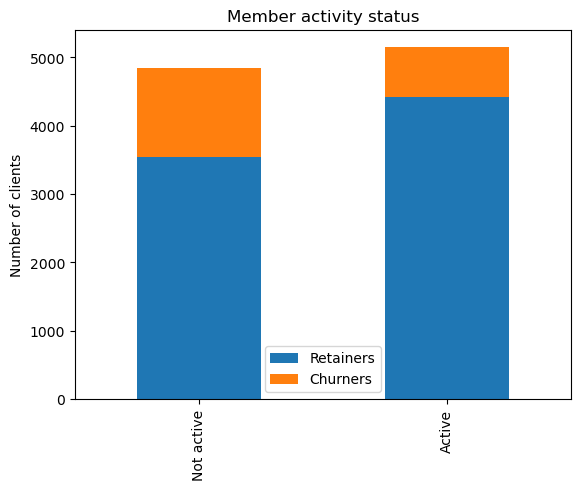

Exited,0,1
IsActiveMember,,
Not active,73.15%,26.85%
Active,85.73%,14.27%


<Figure size 1000x600 with 0 Axes>

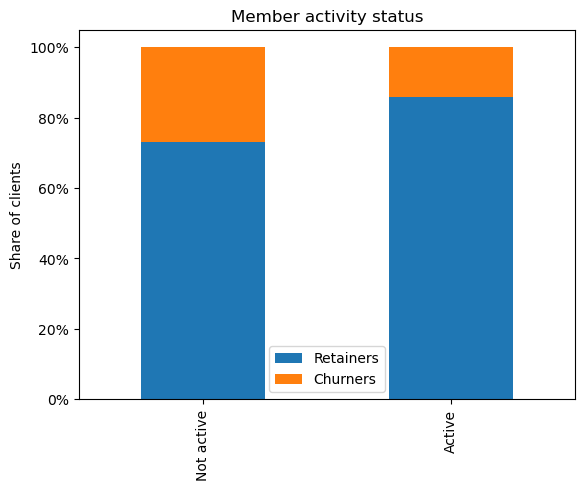

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16244\3249042558.py:42: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['IsActiveMember'] = df['IsActiveMember'].replace({'Not active' : 0, 'Active':1})
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16244\3249042558.py:42: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['IsActiveMember'] = df['IsActiveMember'].replace({'Not active' : 0, 'Active':1})


In [136]:
# analizing IsActiveMember
# Analysis of the impact of beeing Activ/Non-Active Member on customer retention/churn


# Replace 0 and 1 in HasCrCard column with 'Not active' and 'Active'
df['IsActiveMember'] = df['IsActiveMember'].replace({0: 'Not active', 1: 'Active'})

# creating crosstab
IsActiveMember_crosstab = pd.crosstab(df['IsActiveMember'], df['Exited'])
display(IsActiveMember_crosstab)
# moves the index (IsActiveMember) to a column and resets the index to default integers
IsActiveMember_crosstab = IsActiveMember_crosstab.reset_index()

# bar plot
plt.figure(figsize=(10, 6))
IsActiveMember_crosstab.plot(kind='bar', x='IsActiveMember', stacked=True, ) #
plt.title('Member activity status')
plt.xlabel('')
plt.ylabel('Number of clients')
plt.legend(labels=['Retainers', 'Churners'])  #  0=Retainers, 1=Churners
plt.show()

#####################################################

# creating crosstab with normalization
IsActiveMember_crosstab = pd.crosstab(df['IsActiveMember'], df['Exited'], normalize='index') * 100
display(IsActiveMember_crosstab.round(2).astype(str) + '%')
# moves the index (IsActiveMember) to a column and resets the index to default integers
IsActiveMember_crosstab = pd.crosstab(df['IsActiveMember'], df['Exited'], normalize='index')
IsActiveMember_crosstab = IsActiveMember_crosstab.reset_index()

# bar plot of normalized values
plt.figure(figsize=(10, 6))
ax = IsActiveMember_crosstab.plot(kind='bar', x='IsActiveMember', stacked=True)
plt.title('Member activity status')
plt.xlabel('')
plt.ylabel('Share of clients')
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.legend(labels=['Retainers', 'Churners'])  #  0=Retainers, 1=Churners
plt.show()

df['IsActiveMember'] = df['IsActiveMember'].replace({'Not active' : 0, 'Active':1})

In [137]:
# changing data types
df['CustomerId'] = df['CustomerId'].astype('string')
df['Surname'] = df['Surname'].astype('string')
#df['Geography'] = df['Geography'].map({'Spain':1,'France':2,'Germany':3,})
#df['Geography'] = pd.to_numeric(df['Geography'], downcast='integer')
#df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 0})
#df['Gender'] = pd.to_numeric(df['Gender'], downcast='integer')



display(df.dtypes)

CustomerId         string[python]
Surname            string[python]
CreditScore                 int64
Geography                category
Gender                   category
Age                         int64
Tenure                      int64
Balance                   float64
NumOfProducts               int64
HasCrCard                category
IsActiveMember           category
EstimatedSalary           float64
Exited                   category
dtype: object

In [138]:
# read statistics
display(df.describe().round(2))

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,650.53,38.92,5.01,76485.89,1.53,100090.24
std,96.65,10.49,2.89,62397.41,0.58,57510.49
min,350.00,18.00,0.00,0.00,1.00,11.58
25%,584.00,32.00,3.00,0.00,1.00,51002.11
50%,652.00,37.00,5.00,97198.54,1.00,100193.92
75%,718.00,44.00,7.00,127644.24,2.00,149388.25
max,850.00,92.00,10.00,250898.09,4.00,199992.48


In [139]:
#checking Nans
print("\nNaN values per column:")
display(df.isna().sum())


NaN values per column:


CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [140]:
#checking duplicates

duplicates = df.duplicated()
duplicate_count = duplicates.sum()
print('Number of duplicate rows:', duplicate_count)

Number of duplicate rows: 0


In [141]:
# unique_counts = df.nunique()
print('Unique values per column:\n\n', df.nunique())

Unique values per column:

 CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64


In [142]:
# columnes with few unique values

column_with_few_unique_values = [
    'Geography',
    'Gender',
    'Tenure',
    'NumOfProducts',
    'HasCrCard',
    'IsActiveMember',
    'Exited',]

# examine unique values
for column in column_with_few_unique_values:
    # count of unique values
    display(df[column].value_counts())
        
    # % of unique values
    #display(pd.crosstab(index=df[column], columns='count', normalize='columns'))
        
    print('-' * 40)  # separator

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

----------------------------------------


Gender
Male      5457
Female    4543
Name: count, dtype: int64

----------------------------------------


Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

----------------------------------------


NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

----------------------------------------


HasCrCard
1    7055
0    2945
Name: count, dtype: int64

----------------------------------------


IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

----------------------------------------


Exited
0    7963
1    2037
Name: count, dtype: int64

----------------------------------------


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16244\3424278965.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Age', 'Exited']).size().unstack(fill_value=0)


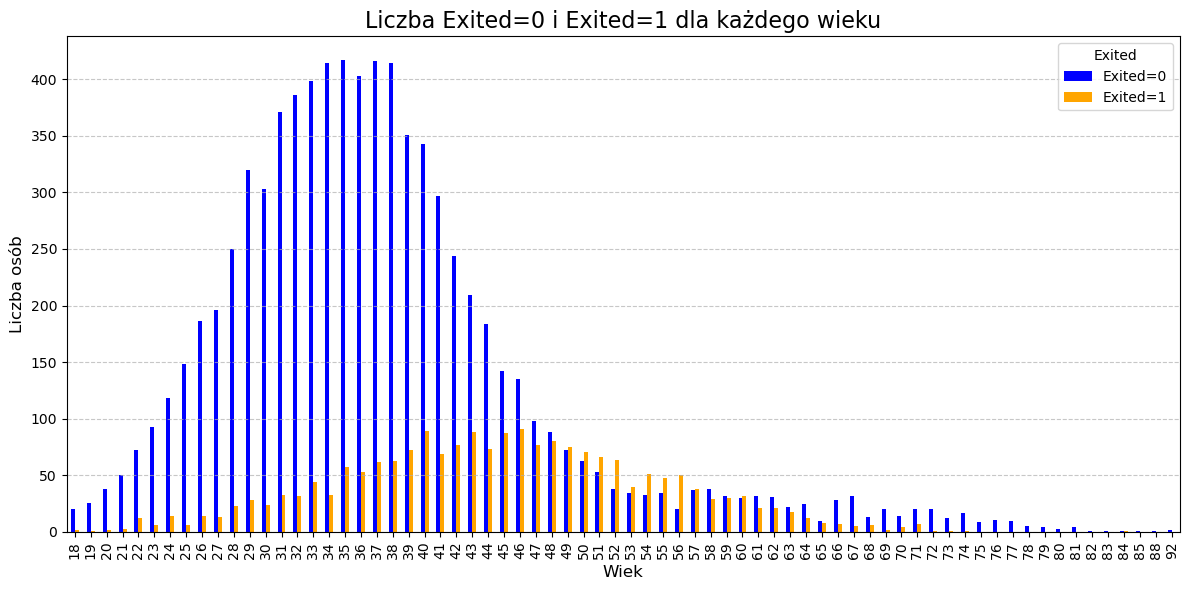

In [143]:
grouped = df.groupby(['Age', 'Exited']).size().unstack(fill_value=0)

# Tworzenie wykresu
grouped.plot(kind='bar', stacked=False, figsize=(12, 6), color=['blue', 'orange'])

# Dodanie tytułu i etykiet osi
plt.title('Liczba Exited=0 i Exited=1 dla każdego wieku', fontsize=16)
plt.xlabel('Wiek', fontsize=12)
plt.ylabel('Liczba osób', fontsize=12)
plt.legend(['Exited=0', 'Exited=1'], title='Exited', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16244\4063625842.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Tenure', 'Exited']).size().unstack(fill_value=0)


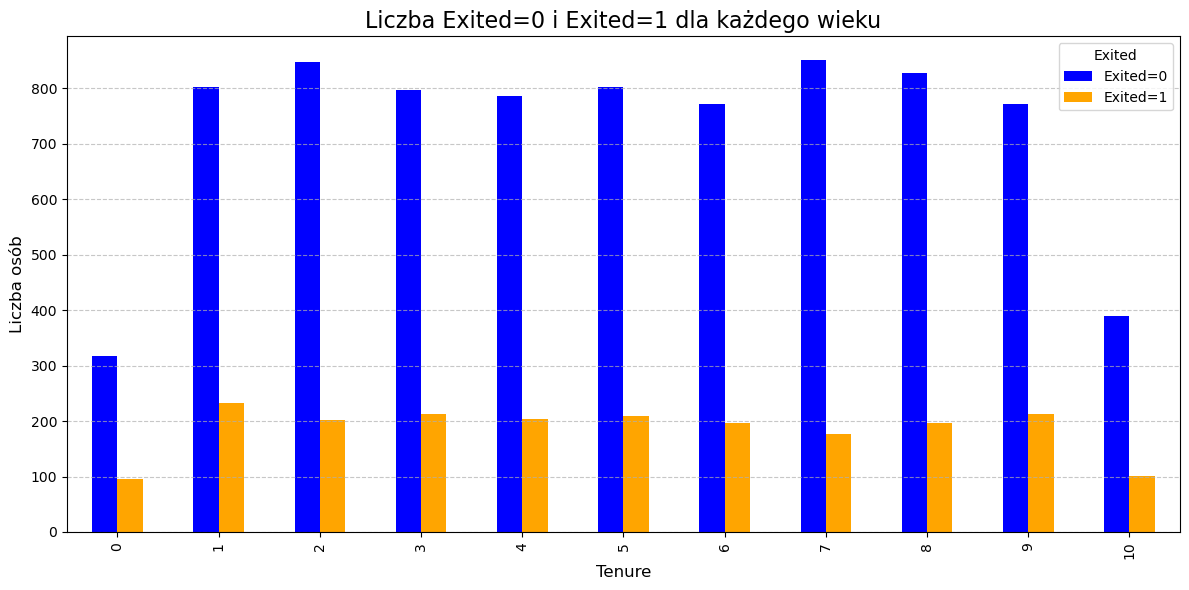

In [144]:
grouped = df.groupby(['Tenure', 'Exited']).size().unstack(fill_value=0)

# Tworzenie wykresu
grouped.plot(kind='bar', stacked=False, figsize=(12, 6), color=['blue', 'orange'])

# Dodanie tytułu i etykiet osi
plt.title('Liczba Exited=0 i Exited=1 dla każdego wieku', fontsize=16)
plt.xlabel('Tenure', fontsize=12)
plt.ylabel('Liczba osób', fontsize=12)
plt.legend(['Exited=0', 'Exited=1'], title='Exited', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16244\2514383450.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['CreditScore', 'Exited']).size().unstack(fill_value=0)


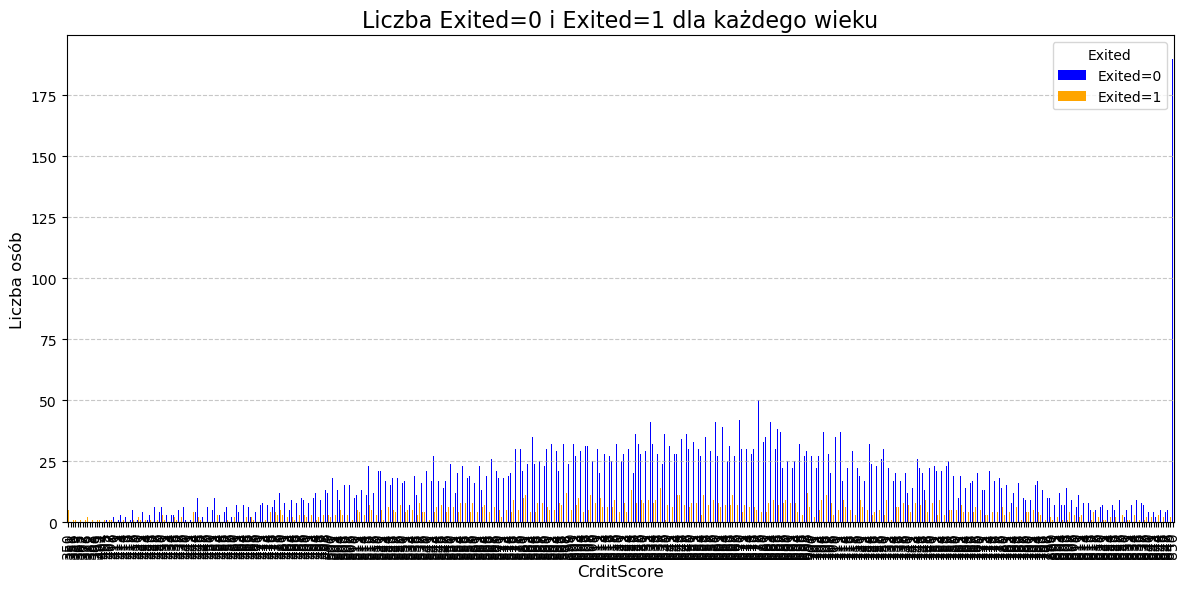

In [145]:
grouped = df.groupby(['CreditScore', 'Exited']).size().unstack(fill_value=0)

# Tworzenie wykresu
grouped.plot(kind='bar', stacked=False, figsize=(12, 6), color=['blue', 'orange'])

# Dodanie tytułu i etykiet osi
plt.title('Liczba Exited=0 i Exited=1 dla każdego wieku', fontsize=16)
plt.xlabel('CrditScore', fontsize=12)
plt.ylabel('Liczba osób', fontsize=12)
plt.legend(['Exited=0', 'Exited=1'], title='Exited', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()

Conclusions:

In [146]:
# distribution of numerical values
#display(sns.pairplot(df, hue = 'Exited',diag_kws={'common_norm': True}))

Conclusions:
    After first glance the churn is mostly to see for:
    - Age between 40 and 60
    - NumOfProducts of 3 and more
    - CreditScore of less than 400
    - German customers        

#corelated fetures

<Axes: >

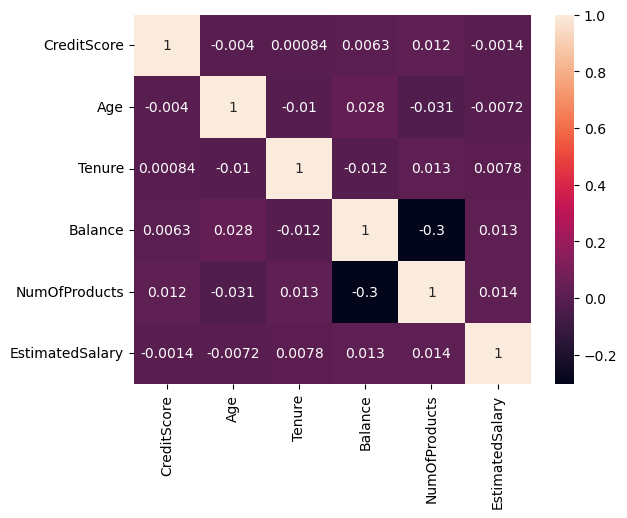

In [147]:
#corelated fetures
# Wybieramy tylko kolumny numeryczne
numerical_df = df.select_dtypes(include=['float64', 'int64', 'int8' ])

# Obliczamy korelację tylko na danych numerycznych
sns.heatmap(numerical_df.corr(), annot=True)

In [148]:
numerical_df.corr().round(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
CreditScore,1.00,-0.00,0.00,0.01,0.01,-0.00
Age,-0.00,1.00,-0.01,0.03,-0.03,-0.01
Tenure,0.00,-0.01,1.00,-0.01,0.01,0.01
Balance,0.01,0.03,-0.01,1.00,-0.30,0.01
NumOfProducts,0.01,-0.03,0.01,-0.30,1.00,0.01
EstimatedSalary,-0.00,-0.01,0.01,0.01,0.01,1.00


The correlations between are not significant. The highest is 0.33 between Balance and Geography. Similar correlated are  Age,  Exited NumOfProducts and Balance.
It is probably due to the fact that they are synthetic data.

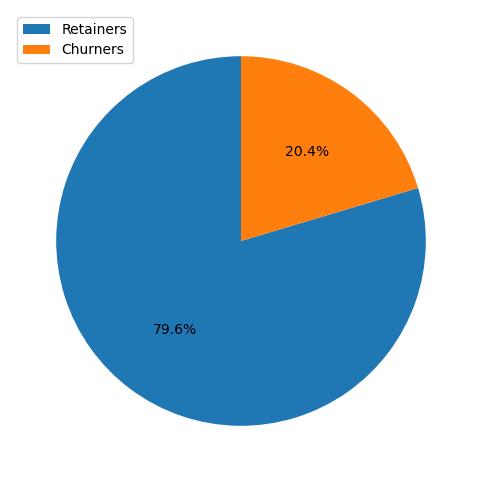

In [149]:
# checking if target categories are balanced
# pie chart of Exited

# data
crosstab = pd.crosstab(index=df['Exited'], columns='count', normalize='columns')
pie_data = crosstab['count'] # transform the crosstab into a simple series for the pie chart
labels = ['Retainers', 'Churners']  # 0: Stayed, 1: Exited
#display(crosstab)

# chart
plt.figure(figsize=(6, 6))
plt.pie(pie_data, autopct='%1.1f%%', startangle=90)
# plt.title('Exited among all cars')
plt.legend(labels, loc="upper left")
plt.show()

In [150]:
# perform train-test-split
df = pd.read_csv("Churn_Modelling.csv")

from sklearn.model_selection import train_test_split

target = df.loc[:,'Exited']
features = df.drop('Exited', axis=1)

features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, 
                                                                            random_state=42,
                                                                            test_size=0.1)
#features_original = features_train

In [151]:
features_test.to_csv('features_test.csv', index=False)

In [152]:
#copy feature_train
df = features_train.copy()

# data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9000 entries, 4896 to 7270
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9000 non-null   int64  
 1   CustomerId       9000 non-null   int64  
 2   Surname          9000 non-null   object 
 3   CreditScore      9000 non-null   int64  
 4   Geography        9000 non-null   object 
 5   Gender           9000 non-null   object 
 6   Age              9000 non-null   int64  
 7   Tenure           9000 non-null   int64  
 8   Balance          9000 non-null   float64
 9   NumOfProducts    9000 non-null   int64  
 10  HasCrCard        9000 non-null   int64  
 11  IsActiveMember   9000 non-null   int64  
 12  EstimatedSalary  9000 non-null   float64
dtypes: float64(2), int64(8), object(3)
memory usage: 984.4+ KB


In [153]:
# delete RowNumber
df = df.drop('RowNumber', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9000 entries, 4896 to 7270
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       9000 non-null   int64  
 1   Surname          9000 non-null   object 
 2   CreditScore      9000 non-null   int64  
 3   Geography        9000 non-null   object 
 4   Gender           9000 non-null   object 
 5   Age              9000 non-null   int64  
 6   Tenure           9000 non-null   int64  
 7   Balance          9000 non-null   float64
 8   NumOfProducts    9000 non-null   int64  
 9   HasCrCard        9000 non-null   int64  
 10  IsActiveMember   9000 non-null   int64  
 11  EstimatedSalary  9000 non-null   float64
dtypes: float64(2), int64(7), object(3)
memory usage: 914.1+ KB


In [154]:
# List of columns to be converted to 'category' type

category_columns = [

 'Geography',
 'Gender',
 'HasCrCard',
 'IsActiveMember',
]

# Convert each column to 'category' type

for column in category_columns:
    df[column] = df[column].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9000 entries, 4896 to 7270
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CustomerId       9000 non-null   int64   
 1   Surname          9000 non-null   object  
 2   CreditScore      9000 non-null   int64   
 3   Geography        9000 non-null   category
 4   Gender           9000 non-null   category
 5   Age              9000 non-null   int64   
 6   Tenure           9000 non-null   int64   
 7   Balance          9000 non-null   float64 
 8   NumOfProducts    9000 non-null   int64   
 9   HasCrCard        9000 non-null   category
 10  IsActiveMember   9000 non-null   category
 11  EstimatedSalary  9000 non-null   float64 
dtypes: category(4), float64(2), int64(5), object(1)
memory usage: 668.5+ KB
